**Importando os pacotes**

In [1]:
#Importa os pacotes que vão ser usados no projeto
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

**Começando com a coleta de dados**

In [2]:
#Lendo o arquivo .csv
data = pd.read_csv("Weather_Data.csv")

#Imprime as 5 primeiras linhas pra uma breve análise
print(data.head())

       Data  Temp9am  Temp3pm  TempMin  TempMax  Chuva ChuvaHoje  Evaporação  \
0  01-02-13     20.7     20.9     19.5     22.4   15.6       Yes         6.2   
1  02-02-13     22.4     24.8     19.5     25.6    6.0       Yes         3.4   
2  03-02-13     23.5     23.0     21.6     24.5    6.6       Yes         2.4   
3  04-02-13     21.4     20.9     20.2     22.8   18.8       Yes         2.2   
4  05-02-13     22.5     25.5     19.7     25.7   77.4       Yes         4.8   

   LuzDoSol DirRajVen  ...  VentDir9am VentDir3pm VelVent9am  VelVent3pm  \
0       0.0         W  ...           S        SSW         17          20   
1       2.7         W  ...           W          E          9          13   
2       0.1         W  ...         ESE        ESE         17           2   
3       0.0         W  ...         NNE          E         22          20   
4       0.0         W  ...         NNE          W         11           6   

   Umidade9am  Umidade3pm  Pressão9am  Pressão3pm  Nuvem9am  N

In [3]:
#Imprime os tipos de dados das colunas
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3271 entries, 0 to 3270
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Data        3271 non-null   object 
 1   Temp9am     3271 non-null   float64
 2   Temp3pm     3271 non-null   float64
 3   TempMin     3271 non-null   float64
 4   TempMax     3271 non-null   float64
 5   Chuva       3271 non-null   float64
 6   ChuvaHoje   3271 non-null   object 
 7   Evaporação  3271 non-null   float64
 8   LuzDoSol    3271 non-null   float64
 9   DirRajVen   3271 non-null   object 
 10  VelRajVen   3271 non-null   int64  
 11  VentDir9am  3271 non-null   object 
 12  VentDir3pm  3271 non-null   object 
 13  VelVent9am  3271 non-null   int64  
 14  VelVent3pm  3271 non-null   int64  
 15  Umidade9am  3271 non-null   int64  
 16  Umidade3pm  3271 non-null   int64  
 17  Pressão9am  3271 non-null   float64
 18  Pressão3pm  3271 non-null   float64
 19  Nuvem9am    3271 non-null  

**Pré-processamento dos dados**

In [4]:
# Normaliza os dados numéricos
for coluna in data.columns:
    # Verifica se a coluna é numérica
    if data[coluna].dtype.name in ["float64", "int64"]:
        # Normaliza a coluna
        data[coluna] = data[coluna] / data[coluna].max()

In [5]:
#Codifica as colunas categoricas
for column in data.columns:
    #Checa se uma coluna é categorica
    if data[column].dtype.name == "object":
        #Codifica a coluna
        data[column] = data[column].astype("category")
        data[column] = data[column].cat.codes

In [6]:
#Visualização de como os dados ficaram
data.head()

,Data,Temp9am,Temp3pm,TempMin,TempMax,Chuva,ChuvaHoje,Evaporação,LuzDoSol,DirRajVen,...,VentDir9am,VentDir3pm,VelVent9am,VelVent3pm,Umidade9am,Umidade3pm,Pressão9am,Pressão3pm,Nuvem9am,Nuvem3pm
0,9,0.567123,0.467562,0.706522,0.489083,0.130653,1,0.336957,0.000000,13,...,8,11,0.314815,0.350877,0.92,0.848485,0.979403,0.981383,0.888889,1.000
1,117,0.613699,0.554810,0.706522,0.558952,0.050251,1,0.184783,0.198529,13,...,13,0,0.166667,0.228070,0.83,0.737374,0.979692,0.980419,0.777778,0.875
2,225,0.643836,0.514541,0.782609,0.534934,0.055276,1,0.130435,0.007353,13,...,2,2,0.314815,0.035088,0.88,0.868687,0.978537,0.979647,0.777778,1.000
3,333,0.586301,0.467562,0.731884,0.497817,0.157454,1,0.119565,0.000000,13,...,5,0,0.407407,0.350877,0.83,0.909091,0.976131,0.975981,0.888889,1.000
4,441,0.616438,0.570470,0.713768,0.561135,0.648241,1,0.260870,0.000000,13,...,5,13,0.203704,0.105263,0.88,0.747475,0.970452,0.969229,0.888889,1.000


**Modelagem**

In [7]:
#Cria o modelo
model = LogisticRegression(max_iter=1000)

#Treina o modelo
model.fit(data.drop(columns=["ChuvaHoje"]), data["ChuvaHoje"])

LogisticRegression(max_iter=1000)

**Avaliação**

In [8]:
#Faz as predições
predictions = model.predict(data.drop(columns=["ChuvaHoje"]))

#Calcula a precisão dos acertos
accuracy = accuracy_score(data["ChuvaHoje"], predictions)

#Imprime o valor da precisão em decimais
print(accuracy)

0.8284928156527056


**Visualização dos dados**

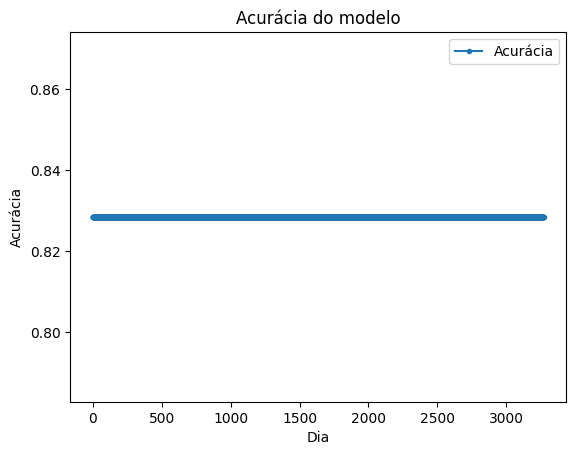

In [9]:
#Cria a plot
plt.plot(data["Data"], accuracy.repeat(3271), marker=".", label="Acurácia")

#Adiciona um titulo
plt.title("Acurácia do modelo")

#Adiciona um nome aos eixos di gráfico
plt.xlabel("Dia")
plt.ylabel("Acurácia")

#Adiciona uma legenda
plt.legend()

#Mostra o gráfico
plt.show()